<a href="https://colab.research.google.com/github/vitroid/snakeskin/blob/main/snakeskin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
import random
from icecream import ic
import matplotlib.pyplot as plt
import numpy as np

L = 64
centers = [(x, y) for x in range(0, L, L // 4) for y in range(0, L, L // 4)]

skin = np.zeros([L, L])

queue = []
for center in centers:
    skin[center] = 1
    queue.append(center)

# for _ in range(40000):
while len(queue):
    i = random.choice(range(len(queue)))
    point = queue.pop(i)
    depth = skin[point]
    assert depth > 0
    x, y = point
    for a in (-1, 0, 1):
        for b in (-1, 0, 1):
            if a + b == 0:
                continue
            xx = (x + a + L) % L
            yy = (y + b + L) % L
            if skin[xx, yy] == 0:
                skin[xx, yy] = depth + 1
                queue.append((xx, yy))
dmax = np.max(skin)
skin = (skin + dmax * 3 // 6) % dmax

In [ ]:
dskin = np.triu(skin) + np.triu(skin, k=1).T

upper = np.triu(skin)
lower = np.tril(skin)
bigskin = np.zeros([L * 2, L * 2])
bigskin[0:L, 0:L] = dskin
bigskin[L : 2 * L, L : 2 * L] = dskin
bigskin[0:L, L : 2 * L] = skin
bigskin[L : 2 * L, :L] = skin.T

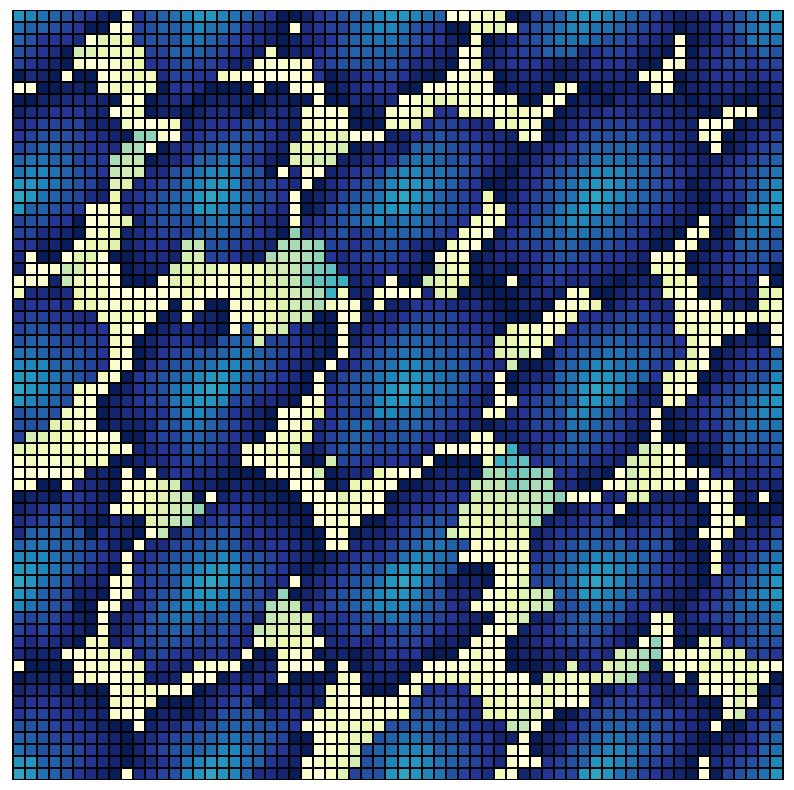

In [ ]:
# plt.imshow(skin, cmap=plt.cm.copper)
fig, ax = plt.subplots(figsize=(10, 10))
plt.pcolormesh(dskin, edgecolors="k", linewidth=0.2, cmap=plt.cm.YlGnBu)
plt.axis("equal")
plt.setp(ax.spines.values(), alpha=0)
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
fig.savefig("python.png")

In [ ]:
from PIL import Image


def crop_center(pil_img):
    img_width, img_height = pil_img.size
    crop_width = img_width // 2
    crop_height = img_height // 2
    return pil_img.crop(
        (
            (img_width - crop_width) // 2,
            (img_height - crop_height) // 2,
            (img_width + crop_width) // 2,
            (img_height + crop_height) // 2,
        )
    )


im = Image.open("python.png")
rot = crop_center(im.rotate(45)).resize([L * 5, L * 7], resample=Image.LANCZOS)
rot.show()
rot.save("python_pat.png")